In [137]:
from pathlib import Path
import os
import toml
from IPython import get_ipython
from IPython.core.magic import register_cell_magic

ipython = get_ipython()


@register_cell_magic
def pybash(line, cell):
    ipython.run_cell_magic("bash", "", cell.format(**globals()))

In [138]:
tmp_dir = Path("../tmp/files_example")
structure_file = Path("../data/1KT0/1kt0.cif")
structure_svg = tmp_dir / "1kt0.svg"
style_file = tmp_dir / "style.toml"
annotations_file = tmp_dir / "annotations.toml"


os.makedirs(tmp_dir, exist_ok=True)

In [139]:
annotations = """
# FlatProt Annotation Example
# This file demonstrates the different types of annotations available in FlatProt

[[annotations]]
type = "point"
label = "Example Point Annotation"
index = "A:90"
[annotations.style]
marker_shape = "circle"

[[annotations]]
type = "point"
label = "Example Point Annotation"
index = "A:160"
[annotations.style]
marker_shape = "circle"

[[annotations]]
type = "line"
label = "Example Line Annotation"
indices = ["A:46", "A:67"]
[annotations.style]
label_color = "#0000FF"
label_font_size = 12
label_font_weight = "bold"
label_font_family = "Arial, sans-serif"


[[annotations]]
type = "line"
label = "Example Line Annotation"
indices = ["A:200", "A:210"]
[annotations.style]
label_color = "#0000FF"
label_font_size = 12

[[annotations]]
type = "area"
label = "Example Area Annotation"
range = "A:100-150"
[annotations.style]
fill_color = "#00FF00"
opacity = 0.2

"""


style = """
# Style definitions for protein secondary structures

[helix]
color = "#FF7D7D"   # Light red
stroke_color = "#CC0000" # Darker red
stroke_width = 1.5
opacity = 0.8

[sheet]
color = "#7D7DFF"   # Light blue
stroke_color = "#0000CC" # Darker blue
stroke_width = 1.5
opacity = 0.8

[coil]
stroke_color = "#777777" # Gray
stroke_width = 1.0
opacity = 1
"""

with style_file.open("w") as f:
    f.write(style)
with annotations_file.open("w") as f:
    f.write(annotations)


In [140]:
%%pybash
# Access Python variables in bash using curly braces

uv run flatprot project {structure_file} {structure_svg} --style {style_file} --annotations {annotations_file}



2025-04-16 19:18:09 INFO     Applying inertia transformation...                 
2025-04-16 19:18:09 INFO     Inertia transformation complete.                   
2025-04-16 19:18:09 INFO     Applying projection transformation to structure... 
2025-04-16 19:18:09 INFO     Performing orthographic projection internally...   
2025-04-16 19:18:09 INFO     Internal projection complete.                      
2025-04-16 19:18:09 INFO     Projection transformation applied.                 
2025-04-16 19:18:09 ERROR    IO error: Style error: Invalid TOML format: This   
                             float is missing digits after the point (line 14   
                             column 1 char 266)                                 


CalledProcessError: Command 'b'# Access Python variables in bash using curly braces\n\nuv run flatprot project ../data/1KT0/1kt0.cif ../tmp/files_example/1kt0.svg --style ../tmp/files_example/style.toml --annotations ../tmp/files_example/annotations.toml\n\n'' returned non-zero exit status 1.

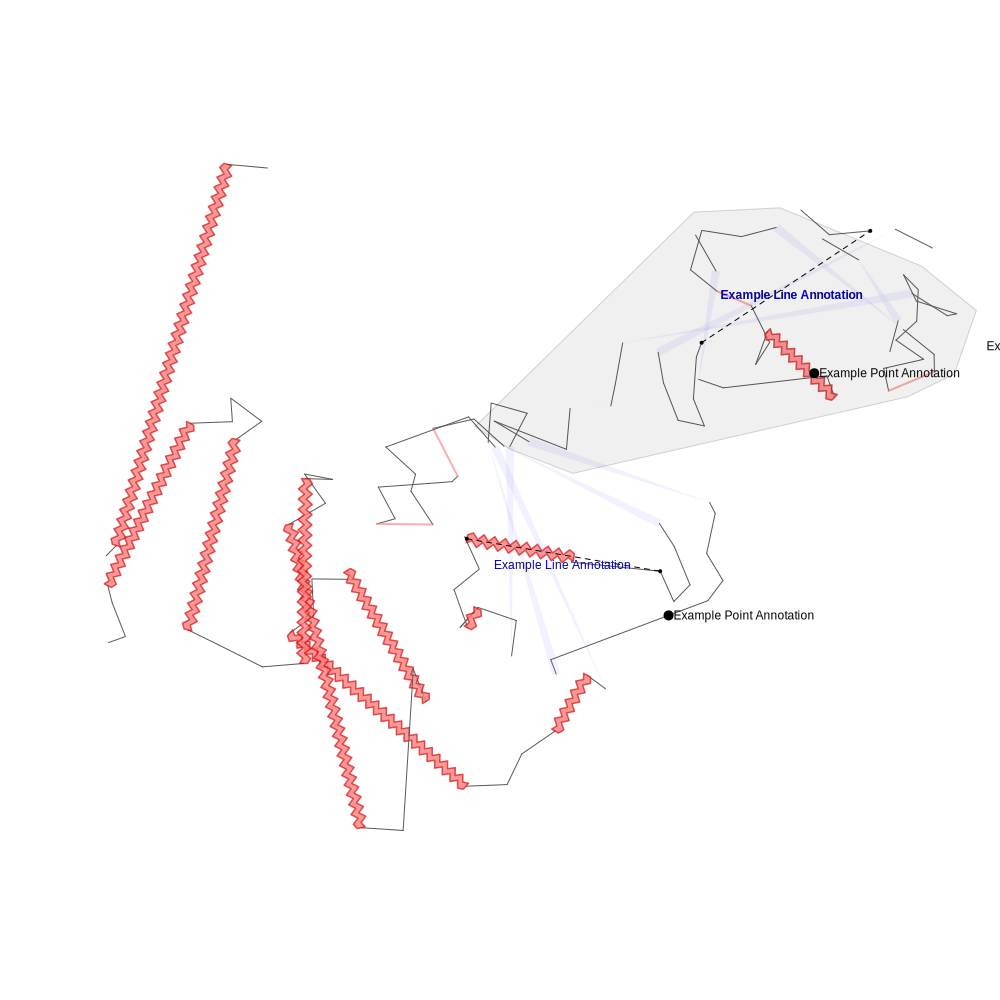

In [ ]:
# Display the overlay SVG in the notebook
from IPython.display import SVG, display

# Load and display the overlay SVG
display(SVG(str(structure_svg)))
